# **IMPORTING DEPENDENCIES**

In [63]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib

In [64]:
df = pd.read_csv("/content/HealthcareProviders.csv")

# **BASIC EXPLORATION OF THE DATASET**

In [65]:
df.describe(include='all')

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
count,1.000000e+05,1.000000e+05,100000,95745,70669,92791,95746,100000,100000,40637,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,NaN,NaN,42820,13022,29,1854,2,2,51928,10024,...,2631,2455,2,2748,1274,1979,49629,38088,83367,76237
top,NaN,NaN,PATEL,MICHAEL,A,MD,M,I,200 1ST ST SW,SUITE 200,...,99213,Established patient office or other outpatient...,N,13,11,12,3,150,2.94,25.32
freq,NaN,NaN,557,2350,8152,32874,66641,95746,244,1624,...,4578,4578,93802,3018,4791,3210,1017,970,623,1630
mean,4.907646e+06,1.498227e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.839633e+06,2.874125e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.090000e+02,1.003001e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.458791e+06,1.245669e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.901266e+06,1.497847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.349450e+06,1.740374e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


** ADDING A NEW COLUMN "MONEY DIFFERENCE" IN THE DATASET WHICH CALCULATES THE DIFFERENCE BETWEEN "AVERAGE SUBMITTED CHARGE AMOUNT" COLUMN AND THE "AVERAGE MEDICARE PAYMENT AMOUNT" COLUMN**

In [66]:
df["Average Submitted Charge Amount"] = df["Average Submitted Charge Amount"].replace(',', '', regex=True)

In [67]:
df["Average Medicare Payment Amount"] = df["Average Medicare Payment Amount"].replace(',', '', regex=True)

In [68]:
df["Money difference"] = df["Average Submitted Charge Amount"].astype(float) - df["Average Medicare Payment Amount"].astype(float)

# **Basic exploration of the dataset with the new column**

In [69]:
df.nunique()

index                                                       100000
National Provider Identifier                                 89508
Last Name/Organization Name of the Provider                  42820
First Name of the Provider                                   13022
Middle Initial of the Provider                                  29
Credentials of the Provider                                   1854
Gender of the Provider                                           2
Entity Type of the Provider                                      2
Street Address 1 of the Provider                             51928
Street Address 2 of the Provider                             10024
City of the Provider                                          5846
Zip Code of the Provider                                     47827
State Code of the Provider                                      58
Country Code of the Provider                                     4
Provider Type                                                 

In [70]:
(df.isnull().sum()/(len(df)))*100

index                                                        0.000
National Provider Identifier                                 0.000
Last Name/Organization Name of the Provider                  0.000
First Name of the Provider                                   4.255
Middle Initial of the Provider                              29.331
Credentials of the Provider                                  7.209
Gender of the Provider                                       4.254
Entity Type of the Provider                                  0.000
Street Address 1 of the Provider                             0.000
Street Address 2 of the Provider                            59.363
City of the Provider                                         0.000
Zip Code of the Provider                                     0.000
State Code of the Provider                                   0.000
Country Code of the Provider                                 0.000
Provider Type                                                0

In [71]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,100000.0,NaN,NaN,NaN,4907645.74603,2839632.695465,209.0,2458790.75,4901266.0,7349450.5,9847440.0
National Provider Identifier,100000.0,NaN,NaN,NaN,1498226858.04662,287412506.095332,1003001298.0,1245669407.25,1497846612.0,1740373949.25,1992999874.0
Last Name/Organization Name of the Provider,100000,42820,PATEL,557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
First Name of the Provider,95745,13022,MICHAEL,2350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Middle Initial of the Provider,70669,29,A,8152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credentials of the Provider,92791,1854,MD,32874,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender of the Provider,95746,2,M,66641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Entity Type of the Provider,100000,2,I,95746,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Street Address 1 of the Provider,100000,51928,200 1ST ST SW,244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Street Address 2 of the Provider,40637,10024,SUITE 200,1624,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Dropping different irrelevant fields throughout the process**

In [72]:
df = df.drop(columns=['index', 'National Provider Identifier','Street Address 1 of the Provider','Street Address 2 of the Provider','Country Code of the Provider'])

In [73]:
df['Last Name/Organization Name of the Provider'] = df['First Name of the Provider'].astype(str) + " " + df['Last Name/Organization Name of the Provider']

In [74]:
df.head()

,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,...,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Money difference
0,SATYASREE UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,SAINT LOUIS,631041004.0,MO,Internal Medicine,...,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889,147.948889
1,WENDY JONES,WENDY,P,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,Obstetrics & Gynecology,...,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714,429.970000
2,RICHARD DUROCHER,RICHARD,W,DPM,M,I,NORTH HAVEN,64732343.0,CT,Podiatry,...,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375,90.560312
3,JASPER FULLARD,JASPER,NaN,MD,M,I,KANSAS CITY,641183998.0,MO,Internal Medicine,...,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43,1.570000
4,ANTHONY PERROTTI,ANTHONY,E,DO,M,I,JUPITER,334585700.0,FL,Internal Medicine,...,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758,20.460606


In [75]:
df=df.drop(columns=['First Name of the Provider'])

In [76]:
df.head()

,Last Name/Organization Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,Medicare Participation Indicator,...,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Money difference
0,SATYASREE UPADHYAYULA,NaN,M.D.,F,I,SAINT LOUIS,631041004.0,MO,Internal Medicine,Y,...,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889,147.948889
1,WENDY JONES,P,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,Obstetrics & Gynecology,Y,...,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714,429.970000
2,RICHARD DUROCHER,W,DPM,M,I,NORTH HAVEN,64732343.0,CT,Podiatry,Y,...,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375,90.560312
3,JASPER FULLARD,NaN,MD,M,I,KANSAS CITY,641183998.0,MO,Internal Medicine,Y,...,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43,1.570000
4,ANTHONY PERROTTI,E,DO,M,I,JUPITER,334585700.0,FL,Internal Medicine,Y,...,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758,20.460606


In [77]:
df.rename(columns = {'Last Name/Organization Name of the Provider':'Full name'}, inplace = True)

In [78]:
df.head()

,Full name,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,Medicare Participation Indicator,...,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Money difference
0,SATYASREE UPADHYAYULA,NaN,M.D.,F,I,SAINT LOUIS,631041004.0,MO,Internal Medicine,Y,...,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889,147.948889
1,WENDY JONES,P,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,Obstetrics & Gynecology,Y,...,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714,429.970000
2,RICHARD DUROCHER,W,DPM,M,I,NORTH HAVEN,64732343.0,CT,Podiatry,Y,...,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375,90.560312
3,JASPER FULLARD,NaN,MD,M,I,KANSAS CITY,641183998.0,MO,Internal Medicine,Y,...,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43,1.570000
4,ANTHONY PERROTTI,E,DO,M,I,JUPITER,334585700.0,FL,Internal Medicine,Y,...,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758,20.460606


In [79]:
df=df.drop(columns=['HCPCS Description'])

In [80]:
df.head()

,Full name,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,Medicare Participation Indicator,...,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Money difference
0,SATYASREE UPADHYAYULA,NaN,M.D.,F,I,SAINT LOUIS,631041004.0,MO,Internal Medicine,Y,...,99223,N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889,147.948889
1,WENDY JONES,P,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,Obstetrics & Gynecology,Y,...,G0202,N,175,175,175,123.73,548.8,118.83,135.31525714,429.970000
2,RICHARD DUROCHER,W,DPM,M,I,NORTH HAVEN,64732343.0,CT,Podiatry,Y,...,99348,N,32,13,32,90.65,155,64.4396875,60.5959375,90.560312
3,JASPER FULLARD,NaN,MD,M,I,KANSAS CITY,641183998.0,MO,Internal Medicine,Y,...,81002,N,20,18,20,3.5,5,3.43,3.43,1.570000
4,ANTHONY PERROTTI,E,DO,M,I,JUPITER,334585700.0,FL,Internal Medicine,Y,...,96372,N,33,24,31,26.52,40,19.539393939,19.057575758,20.460606


### **Finding the mean and standard deviation of the Money difference column and then finding the Z-score of each row **

In [81]:
mean = np.mean(df["Money difference"])
std = np.std(df["Money difference"])
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 277.19165543803854
std. deviation is 924.8938668135768


In [82]:
threshold = 3
outlier = []
for i in df["Money difference"]:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is [4903.03071429, 7177.5219355, 5554.8092308, 5338.9915790000005, 5452.4853846, 4071.7436913, 3168.3871429, 7413.323333299999, 7159.16301205, 9933.1763636, 4822.53294118, 13832.885, 3533.14740331, 9377.5338095, 5171.43242153, 11642.71, 3343.0361290299998, 6398.92538462, 4982.326, 4006.542973, 6397.964507080001, 5873.700000000001, 5411.3152174, 4889.573276882, 29021.991875, 3521.7148571400003, 7810.418666699999, 3648.6304395800003, 5163.07307692, 3729.22, 3425.9775308, 7799.201111120001, 5765.6685714, 3412.1461538599997, 6550.96, 4314.96, 6214.62090909, 5258.2467164, 5112.11576475, 9790.5944182, 12284.515, 4128.2553333, 10987.428846499999, 5404.0697143, 3417.38, 6134.6764865000005, 3820.91071429, 5252.4815, 5809.91607143, 5941.11461537, 3081.77277773, 9390.56117647, 4038.14652174, 3716.751, 3122.0025, 3932.707727273, 3263.185, 6468.72307694, 4311.1666667, 4883.2008696, 7110.09470588, 4425.872, 5185.72, 4890.5146667, 4175.00899997, 21803.55333333, 15649.177878303, 409

## Plotting a distribution graph of the Money Difference column

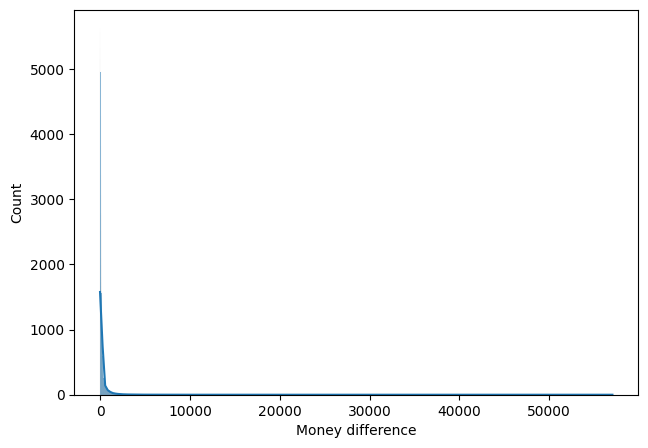

In [83]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['Money difference'], kde=True)

plt.show()

### Scaling the numerical fields using the formula of min max scaler

In [84]:
column = 'Money difference'
df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

display(df)

,Full name,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,Medicare Participation Indicator,...,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Money difference
0,SATYASREE UPADHYAYULA,NaN,M.D.,F,I,SAINT LOUIS,631041004.0,MO,Internal Medicine,Y,...,99223,N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889,0.002891
1,WENDY JONES,P,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,Obstetrics & Gynecology,Y,...,G0202,N,175,175,175,123.73,548.8,118.83,135.31525714,0.007834
2,RICHARD DUROCHER,W,DPM,M,I,NORTH HAVEN,64732343.0,CT,Podiatry,Y,...,99348,N,32,13,32,90.65,155,64.4396875,60.5959375,0.001885
3,JASPER FULLARD,NaN,MD,M,I,KANSAS CITY,641183998.0,MO,Internal Medicine,Y,...,81002,N,20,18,20,3.5,5,3.43,3.43,0.000325
4,ANTHONY PERROTTI,E,DO,M,I,JUPITER,334585700.0,FL,Internal Medicine,Y,...,96372,N,33,24,31,26.52,40,19.539393939,19.057575758,0.000656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,JOAN PAPES,NaN,PT,F,I,WILMINGTON,604811236.0,IL,Physical Therapist in Private Practice,Y,...,97162,N,20,20,20,85.3725,214,60.7255,62.2485,0.002984
99996,MARGARET HAYNER,S,ARNP,F,I,REDMOND,977561502.0,OR,Nurse Practitioner,Y,...,99213,N,136,107,136,61.27,144.05147059,30.006176471,37.040220588,0.002297
99997,DANA VALENCIA,NaN,M.D.,M,I,SAINT LOUIS,631312322.0,MO,Cardiology,Y,...,93320,N,11,11,11,17.98,109.54545455,14.09,14.62,0.001971
99998,RAFAELA GONZALEZ-LAMOS,NaN,NaN,F,I,LARCHMONT,105383500.0,NY,Internal Medicine,Y,...,G0008,N,12,12,12,30.54,65,29.93,25.32,0.000912


In [85]:
column = 'Average Medicare Payment Amount'
df[column] = (df[column].astype(float) - df[column].astype(float).min()) / (df[column].astype(float).max() - df[column].astype(float).min())

display(df)

,Full name,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,Medicare Participation Indicator,...,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Money difference
0,SATYASREE UPADHYAYULA,NaN,M.D.,F,I,SAINT LOUIS,631041004.0,MO,Internal Medicine,Y,...,99223,N,27,24,27,200.58777778,305.21111111,0.009787,160.90888889,0.002891
1,WENDY JONES,P,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,Obstetrics & Gynecology,Y,...,G0202,N,175,175,175,123.73,548.8,0.007395,135.31525714,0.007834
2,RICHARD DUROCHER,W,DPM,M,I,NORTH HAVEN,64732343.0,CT,Podiatry,Y,...,99348,N,32,13,32,90.65,155,0.004010,60.5959375,0.001885
3,JASPER FULLARD,NaN,MD,M,I,KANSAS CITY,641183998.0,MO,Internal Medicine,Y,...,81002,N,20,18,20,3.5,5,0.000213,3.43,0.000325
4,ANTHONY PERROTTI,E,DO,M,I,JUPITER,334585700.0,FL,Internal Medicine,Y,...,96372,N,33,24,31,26.52,40,0.001216,19.057575758,0.000656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,JOAN PAPES,NaN,PT,F,I,WILMINGTON,604811236.0,IL,Physical Therapist in Private Practice,Y,...,97162,N,20,20,20,85.3725,214,0.003779,62.2485,0.002984
99996,MARGARET HAYNER,S,ARNP,F,I,REDMOND,977561502.0,OR,Nurse Practitioner,Y,...,99213,N,136,107,136,61.27,144.05147059,0.001867,37.040220588,0.002297
99997,DANA VALENCIA,NaN,M.D.,M,I,SAINT LOUIS,631312322.0,MO,Cardiology,Y,...,93320,N,11,11,11,17.98,109.54545455,0.000876,14.62,0.001971
99998,RAFAELA GONZALEZ-LAMOS,NaN,NaN,F,I,LARCHMONT,105383500.0,NY,Internal Medicine,Y,...,G0008,N,12,12,12,30.54,65,0.001862,25.32,0.000912


In [86]:
column = 'Average Submitted Charge Amount'
df[column] = (df[column].astype(float) - df[column].astype(float).min()) / (df[column].astype(float).max() - df[column].astype(float).min())

display(df)

,Full name,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,Medicare Participation Indicator,...,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Money difference
0,SATYASREE UPADHYAYULA,NaN,M.D.,F,I,SAINT LOUIS,631041004.0,MO,Internal Medicine,Y,...,99223,N,27,24,27,200.58777778,0.004868,0.009787,160.90888889,0.002891
1,WENDY JONES,P,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,Obstetrics & Gynecology,Y,...,G0202,N,175,175,175,123.73,0.008753,0.007395,135.31525714,0.007834
2,RICHARD DUROCHER,W,DPM,M,I,NORTH HAVEN,64732343.0,CT,Podiatry,Y,...,99348,N,32,13,32,90.65,0.002472,0.004010,60.5959375,0.001885
3,JASPER FULLARD,NaN,MD,M,I,KANSAS CITY,641183998.0,MO,Internal Medicine,Y,...,81002,N,20,18,20,3.5,0.000080,0.000213,3.43,0.000325
4,ANTHONY PERROTTI,E,DO,M,I,JUPITER,334585700.0,FL,Internal Medicine,Y,...,96372,N,33,24,31,26.52,0.000638,0.001216,19.057575758,0.000656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,JOAN PAPES,NaN,PT,F,I,WILMINGTON,604811236.0,IL,Physical Therapist in Private Practice,Y,...,97162,N,20,20,20,85.3725,0.003413,0.003779,62.2485,0.002984
99996,MARGARET HAYNER,S,ARNP,F,I,REDMOND,977561502.0,OR,Nurse Practitioner,Y,...,99213,N,136,107,136,61.27,0.002298,0.001867,37.040220588,0.002297
99997,DANA VALENCIA,NaN,M.D.,M,I,SAINT LOUIS,631312322.0,MO,Cardiology,Y,...,93320,N,11,11,11,17.98,0.001747,0.000876,14.62,0.001971
99998,RAFAELA GONZALEZ-LAMOS,NaN,NaN,F,I,LARCHMONT,105383500.0,NY,Internal Medicine,Y,...,G0008,N,12,12,12,30.54,0.001037,0.001862,25.32,0.000912


In [87]:
df.head()

,Full name,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,Medicare Participation Indicator,...,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Money difference
0,SATYASREE UPADHYAYULA,NaN,M.D.,F,I,SAINT LOUIS,631041004.0,MO,Internal Medicine,Y,...,99223,N,27,24,27,200.58777778,0.004868,0.009787,160.90888889,0.002891
1,WENDY JONES,P,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,Obstetrics & Gynecology,Y,...,G0202,N,175,175,175,123.73,0.008753,0.007395,135.31525714,0.007834
2,RICHARD DUROCHER,W,DPM,M,I,NORTH HAVEN,64732343.0,CT,Podiatry,Y,...,99348,N,32,13,32,90.65,0.002472,0.004010,60.5959375,0.001885
3,JASPER FULLARD,NaN,MD,M,I,KANSAS CITY,641183998.0,MO,Internal Medicine,Y,...,81002,N,20,18,20,3.5,0.000080,0.000213,3.43,0.000325
4,ANTHONY PERROTTI,E,DO,M,I,JUPITER,334585700.0,FL,Internal Medicine,Y,...,96372,N,33,24,31,26.52,0.000638,0.001216,19.057575758,0.000656


In [88]:
df["Average Medicare Allowed Amount"] = df["Average Medicare Allowed Amount"].replace('.', '', regex=True)
df["Average Medicare Standardized Amount"] = df["Average Medicare Standardized Amount"].replace('.', '', regex=True)

In [89]:
df.drop(columns=['Average Medicare Allowed Amount','Average Medicare Standardized Amount',], inplace=True)

In [90]:
df.head()

,Full name,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Submitted Charge Amount,Average Medicare Payment Amount,Money difference
0,SATYASREE UPADHYAYULA,NaN,M.D.,F,I,SAINT LOUIS,631041004.0,MO,Internal Medicine,Y,F,99223,N,27,24,27,0.004868,0.009787,0.002891
1,WENDY JONES,P,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,Obstetrics & Gynecology,Y,O,G0202,N,175,175,175,0.008753,0.007395,0.007834
2,RICHARD DUROCHER,W,DPM,M,I,NORTH HAVEN,64732343.0,CT,Podiatry,Y,O,99348,N,32,13,32,0.002472,0.004010,0.001885
3,JASPER FULLARD,NaN,MD,M,I,KANSAS CITY,641183998.0,MO,Internal Medicine,Y,O,81002,N,20,18,20,0.000080,0.000213,0.000325
4,ANTHONY PERROTTI,E,DO,M,I,JUPITER,334585700.0,FL,Internal Medicine,Y,O,96372,N,33,24,31,0.000638,0.001216,0.000656


In [91]:
mean = np.mean(df["Money difference"])
std = np.std(df["Money difference"])
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 0.005155933816918636
std. deviation is 0.01621035059322907


In [92]:
threshold = 3
outlier = []
for i in df["Money difference"]:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is [0.08623169355807118, 0.1260960514481938, 0.09765522942620496, 0.09387265509479728, 0.09586182860426613, 0.07166196337627757, 0.05582909121041109, 0.13022887518707357, 0.12577427984139958, 0.17439361941367468, 0.08482083208422132, 0.24274269867103462, 0.06222214009513836, 0.1646550310959583, 0.0909358936077171, 0.20435612710381107, 0.05889011409909453, 0.11244981211921393, 0.0876214793787706, 0.07051920901223939, 0.11243297109306007, 0.10324433684183285, 0.09514025084465452, 0.08599582889694884, 0.5089578358629917, 0.06202176512430257, 0.1371886516590768, 0.06424617828230543, 0.09078938176271528, 0.06565864848611717, 0.060343804354407435, 0.13699204476689653, 0.10135090085362947, 0.06010138576192941, 0.11511447939191116, 0.07592474614031629, 0.10921956022605839, 0.09245746295404116, 0.08989626750906567, 0.17189462638741376, 0.21560485999716522, 0.07265242678217632, 0.19287120151773665, 0.09501326098161221, 0.060193117888095116, 0.10781839716869931, 0.0672656854425

### Appending a column called Z-score to the dataset to store the Z-score of each row

In [93]:
df["Z-score"] = (df["Money difference"] - mean)/std

### Making a column called Fraud that represents if we consider the data to be a fraudulent data or not depending on the Z-score. If the Z-score is above 3 then we consider it to be anomalous/fraudulent or if the Z-score is less then we consider it normal.

In [94]:
df['Fraud'] = df['Z-score'].apply(lambda x: 0 if x <= 3 else 1)

In [95]:
df.head()

,Full name,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,Medicare Participation Indicator,...,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Submitted Charge Amount,Average Medicare Payment Amount,Money difference,Z-score,Fraud
0,SATYASREE UPADHYAYULA,NaN,M.D.,F,I,SAINT LOUIS,631041004.0,MO,Internal Medicine,Y,...,99223,N,27,24,27,0.004868,0.009787,0.002891,-0.139738,0
1,WENDY JONES,P,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,Obstetrics & Gynecology,Y,...,G0202,N,175,175,175,0.008753,0.007395,0.007834,0.165185,0
2,RICHARD DUROCHER,W,DPM,M,I,NORTH HAVEN,64732343.0,CT,Podiatry,Y,...,99348,N,32,13,32,0.002472,0.004010,0.001885,-0.201787,0
3,JASPER FULLARD,NaN,MD,M,I,KANSAS CITY,641183998.0,MO,Internal Medicine,Y,...,81002,N,20,18,20,0.000080,0.000213,0.000325,-0.298004,0
4,ANTHONY PERROTTI,E,DO,M,I,JUPITER,334585700.0,FL,Internal Medicine,Y,...,96372,N,33,24,31,0.000638,0.001216,0.000656,-0.277579,0


In [96]:
df['Fraud'].value_counts()

Fraud
0    98933
1     1067
Name: count, dtype: int64

In [97]:
df.nunique()

Full name                                                   84197
Middle Initial of the Provider                                 29
Credentials of the Provider                                  1854
Gender of the Provider                                          2
Entity Type of the Provider                                     2
City of the Provider                                         5846
Zip Code of the Provider                                    47827
State Code of the Provider                                     58
Provider Type                                                  90
Medicare Participation Indicator                                2
Place of Service                                                2
HCPCS Code                                                   2631
HCPCS Drug Indicator                                            2
Number of Services                                           2748
Number of Medicare Beneficiaries                             1274
Number of 

In [98]:
df.drop(columns=['Number of Services','Number of Medicare Beneficiaries','Number of Distinct Medicare Beneficiary/Per Day Services','Zip Code of the Provider'], inplace=True)

In [99]:
df.head()

,Full name,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Drug Indicator,Average Submitted Charge Amount,Average Medicare Payment Amount,Money difference,Z-score,Fraud
0,SATYASREE UPADHYAYULA,NaN,M.D.,F,I,SAINT LOUIS,MO,Internal Medicine,Y,F,99223,N,0.004868,0.009787,0.002891,-0.139738,0
1,WENDY JONES,P,M.D.,F,I,FAYETTEVILLE,NC,Obstetrics & Gynecology,Y,O,G0202,N,0.008753,0.007395,0.007834,0.165185,0
2,RICHARD DUROCHER,W,DPM,M,I,NORTH HAVEN,CT,Podiatry,Y,O,99348,N,0.002472,0.004010,0.001885,-0.201787,0
3,JASPER FULLARD,NaN,MD,M,I,KANSAS CITY,MO,Internal Medicine,Y,O,81002,N,0.000080,0.000213,0.000325,-0.298004,0
4,ANTHONY PERROTTI,E,DO,M,I,JUPITER,FL,Internal Medicine,Y,O,96372,N,0.000638,0.001216,0.000656,-0.277579,0


### Applying One hot encoding the the columns with few categories

In [100]:
df = pd.get_dummies(df, columns=['Gender of the Provider','Entity Type of the Provider','Place of Service','Medicare Participation Indicator','HCPCS Drug Indicator'], dtype='int')

In [101]:
df.head()

,Full name,Middle Initial of the Provider,Credentials of the Provider,City of the Provider,State Code of the Provider,Provider Type,HCPCS Code,Average Submitted Charge Amount,Average Medicare Payment Amount,Money difference,...,Gender of the Provider_F,Gender of the Provider_M,Entity Type of the Provider_I,Entity Type of the Provider_O,Place of Service_F,Place of Service_O,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,SATYASREE UPADHYAYULA,NaN,M.D.,SAINT LOUIS,MO,Internal Medicine,99223,0.004868,0.009787,0.002891,...,1,0,1,0,1,0,0,1,1,0
1,WENDY JONES,P,M.D.,FAYETTEVILLE,NC,Obstetrics & Gynecology,G0202,0.008753,0.007395,0.007834,...,1,0,1,0,0,1,0,1,1,0
2,RICHARD DUROCHER,W,DPM,NORTH HAVEN,CT,Podiatry,99348,0.002472,0.004010,0.001885,...,0,1,1,0,0,1,0,1,1,0
3,JASPER FULLARD,NaN,MD,KANSAS CITY,MO,Internal Medicine,81002,0.000080,0.000213,0.000325,...,0,1,1,0,0,1,0,1,1,0
4,ANTHONY PERROTTI,E,DO,JUPITER,FL,Internal Medicine,96372,0.000638,0.001216,0.000656,...,0,1,1,0,0,1,0,1,1,0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Full name                           100000 non-null  object 
 1   Middle Initial of the Provider      70669 non-null   object 
 2   Credentials of the Provider         92791 non-null   object 
 3   City of the Provider                100000 non-null  object 
 4   State Code of the Provider          100000 non-null  object 
 5   Provider Type                       100000 non-null  object 
 6   HCPCS Code                          100000 non-null  object 
 7   Average Submitted Charge Amount     100000 non-null  float64
 8   Average Medicare Payment Amount     100000 non-null  float64
 9   Money difference                    100000 non-null  float64
 10  Z-score                             100000 non-null  float64
 11  Fraud                      

In [103]:
df.drop(columns=['State Code of the Provider'], inplace=True)

### Applying label encoding the fields with large no. of categories

In [104]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Provider Type'] = label_encoder.fit_transform(df['Provider Type'])

In [105]:
df.head()

,Full name,Middle Initial of the Provider,Credentials of the Provider,City of the Provider,Provider Type,HCPCS Code,Average Submitted Charge Amount,Average Medicare Payment Amount,Money difference,Z-score,...,Gender of the Provider_F,Gender of the Provider_M,Entity Type of the Provider_I,Entity Type of the Provider_O,Place of Service_F,Place of Service_O,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,SATYASREE UPADHYAYULA,NaN,M.D.,SAINT LOUIS,39,99223,0.004868,0.009787,0.002891,-0.139738,...,1,0,1,0,1,0,0,1,1,0
1,WENDY JONES,P,M.D.,FAYETTEVILLE,54,G0202,0.008753,0.007395,0.007834,0.165185,...,1,0,1,0,0,1,0,1,1,0
2,RICHARD DUROCHER,W,DPM,NORTH HAVEN,71,99348,0.002472,0.004010,0.001885,-0.201787,...,0,1,1,0,0,1,0,1,1,0
3,JASPER FULLARD,NaN,MD,KANSAS CITY,39,81002,0.000080,0.000213,0.000325,-0.298004,...,0,1,1,0,0,1,0,1,1,0
4,ANTHONY PERROTTI,E,DO,JUPITER,39,96372,0.000638,0.001216,0.000656,-0.277579,...,0,1,1,0,0,1,0,1,1,0


In [106]:
df.drop(columns=['City of the Provider'], inplace=True)

In [107]:
df.head()

,Full name,Middle Initial of the Provider,Credentials of the Provider,Provider Type,HCPCS Code,Average Submitted Charge Amount,Average Medicare Payment Amount,Money difference,Z-score,Fraud,Gender of the Provider_F,Gender of the Provider_M,Entity Type of the Provider_I,Entity Type of the Provider_O,Place of Service_F,Place of Service_O,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,SATYASREE UPADHYAYULA,NaN,M.D.,39,99223,0.004868,0.009787,0.002891,-0.139738,0,1,0,1,0,1,0,0,1,1,0
1,WENDY JONES,P,M.D.,54,G0202,0.008753,0.007395,0.007834,0.165185,0,1,0,1,0,0,1,0,1,1,0
2,RICHARD DUROCHER,W,DPM,71,99348,0.002472,0.004010,0.001885,-0.201787,0,0,1,1,0,0,1,0,1,1,0
3,JASPER FULLARD,NaN,MD,39,81002,0.000080,0.000213,0.000325,-0.298004,0,0,1,1,0,0,1,0,1,1,0
4,ANTHONY PERROTTI,E,DO,39,96372,0.000638,0.001216,0.000656,-0.277579,0,0,1,1,0,0,1,0,1,1,0


In [108]:
df.drop(columns=['Full name','Middle Initial of the Provider','Credentials of the Provider'], inplace=True)

In [109]:
df.head()

,Provider Type,HCPCS Code,Average Submitted Charge Amount,Average Medicare Payment Amount,Money difference,Z-score,Fraud,Gender of the Provider_F,Gender of the Provider_M,Entity Type of the Provider_I,Entity Type of the Provider_O,Place of Service_F,Place of Service_O,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,39,99223,0.004868,0.009787,0.002891,-0.139738,0,1,0,1,0,1,0,0,1,1,0
1,54,G0202,0.008753,0.007395,0.007834,0.165185,0,1,0,1,0,0,1,0,1,1,0
2,71,99348,0.002472,0.004010,0.001885,-0.201787,0,0,1,1,0,0,1,0,1,1,0
3,39,81002,0.000080,0.000213,0.000325,-0.298004,0,0,1,1,0,0,1,0,1,1,0
4,39,96372,0.000638,0.001216,0.000656,-0.277579,0,0,1,1,0,0,1,0,1,1,0


In [110]:
df['Fraud'].value_counts()

Fraud
0    98933
1     1067
Name: count, dtype: int64

### Dropping the Fraud column to avoid bias in the model while training

In [111]:
df.drop(columns=['Fraud'], inplace=True)

In [112]:
df.drop(columns=['HCPCS Code'], inplace=True)

### Applying pca to the dataset to find the first two pricipal components

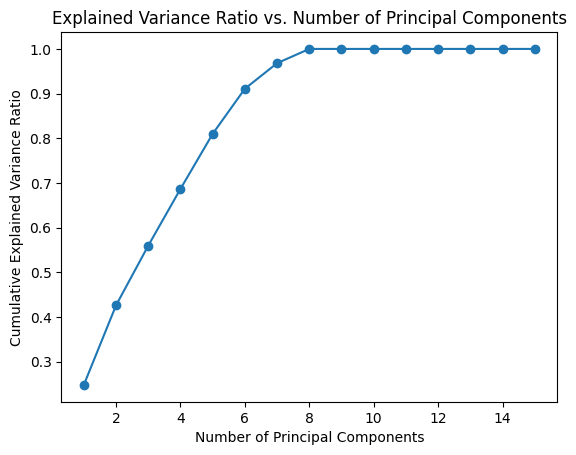

In [113]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_std = scaler.fit_transform(df)

pca = PCA()
X_pca = pca.fit_transform(X_std)

explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

In [114]:
pca = PCA(n_components=8)

pca.fit(df)

X1=pca.fit_transform(df)
X1

array([[-8.17503227e-01,  1.49308243e-03, -2.55628531e-01, ...,
         5.79848111e-02, -1.90651197e-04,  6.86814364e-03],
       [ 1.41905617e+01,  6.82606153e-02,  8.74523122e-01, ...,
         2.95552848e-02, -8.44388260e-04,  1.48919083e-03],
       [ 3.11873179e+01, -1.65266953e-01, -2.53621286e-02, ...,
        -8.06726757e-02, -5.39170596e-04,  3.77080421e-04],
       ...,
       [-2.98201280e+01, -1.12108683e-01, -8.18641713e-01, ...,
         4.36599782e-02, -1.78205037e-04, -2.03053964e-03],
       [-8.07896826e-01, -4.08762517e-01,  8.80901136e-01, ...,
         4.18222114e-02, -9.66905755e-04, -6.08119637e-04],
       [ 2.81912661e+01, -3.12251292e-01,  7.03029656e-01, ...,
        -1.22970456e-02, -7.75550645e-04, -7.39638576e-04]])

In [115]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA(n_components=2)
pca_fit = pca.fit(scaled_data)
u = pca.components_.T

pca_component = pd.DataFrame(u,
                             index=df.columns,
                             columns=['PC1', 'PC2']
                            )

print(pca_component)

                                         PC1       PC2
Provider Type                      -0.074173  0.007580
Average Submitted Charge Amount     0.498565  0.092612
Average Medicare Payment Amount     0.385175  0.096741
Money difference                    0.489624  0.085511
Z-score                             0.489624  0.085511
Gender of the Provider_F           -0.070783  0.086619
Gender of the Provider_M            0.040798 -0.266392
Entity Type of the Provider_I      -0.064003 -0.427396
Entity Type of the Provider_O       0.064003  0.427396
Place of Service_F                  0.207384 -0.311517
Place of Service_O                 -0.207384  0.311517
Medicare Participation Indicator_N -0.007491  0.001393
Medicare Participation Indicator_Y  0.007491 -0.001393
HCPCS Drug Indicator_N              0.092503 -0.405887
HCPCS Drug Indicator_Y             -0.092503  0.405887


### Plotting the first two Pca components

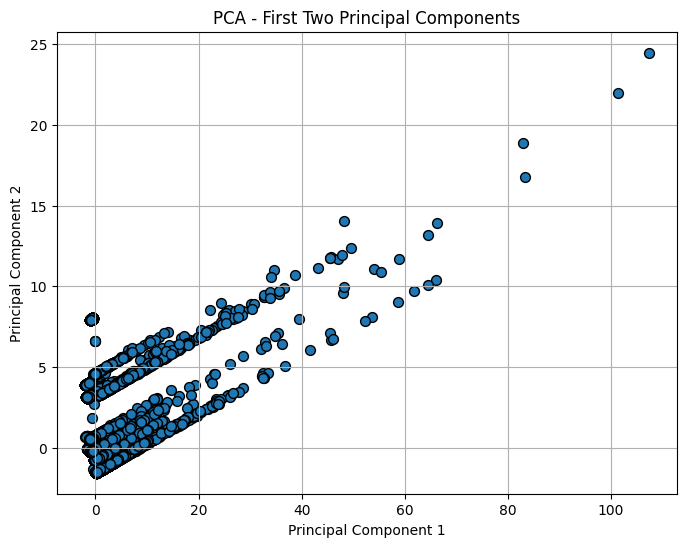

In [116]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Performing PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled_data)

# Creating a DataFrame for the transformed data
pca_df = pd.DataFrame(pca_transformed, columns=['PC1', 'PC2'])

# Scatter plot of the first two PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], edgecolor='k', s=50)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

### Using the elbow method to find the optimal no. of clusters in the k-means algorithm

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

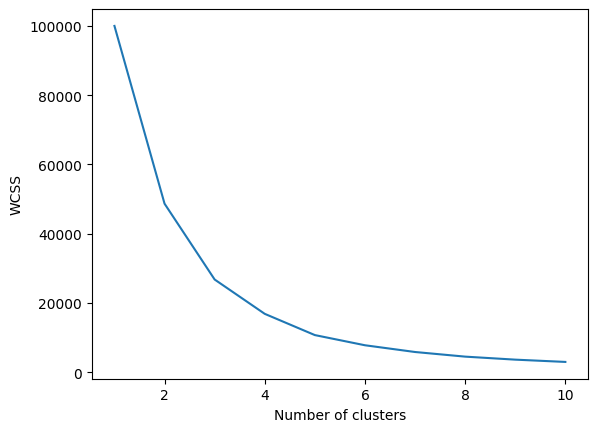

In [131]:
X = df.iloc[:, [2, 4]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Applying K-means algorithm to the data and making a scatter plot to visualize the clusters

In [132]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


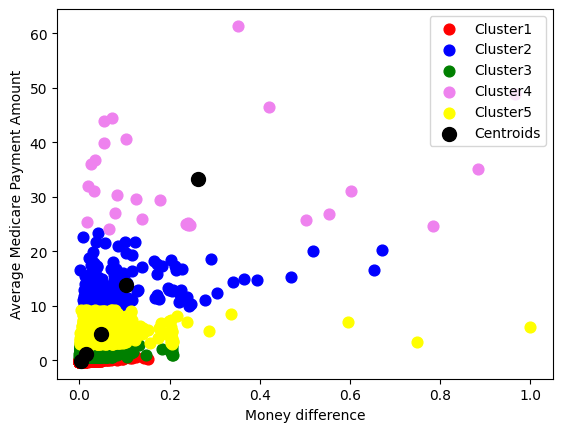

In [133]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Money difference')
plt.ylabel('Average Medicare Payment Amount')
plt.legend()

plt.show()

### Applying Dbscan to the data and making a scatter plot to see the clusters

In [122]:
from sklearn.cluster import DBSCAN

In [123]:
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(df)
labels = db_default.labels_

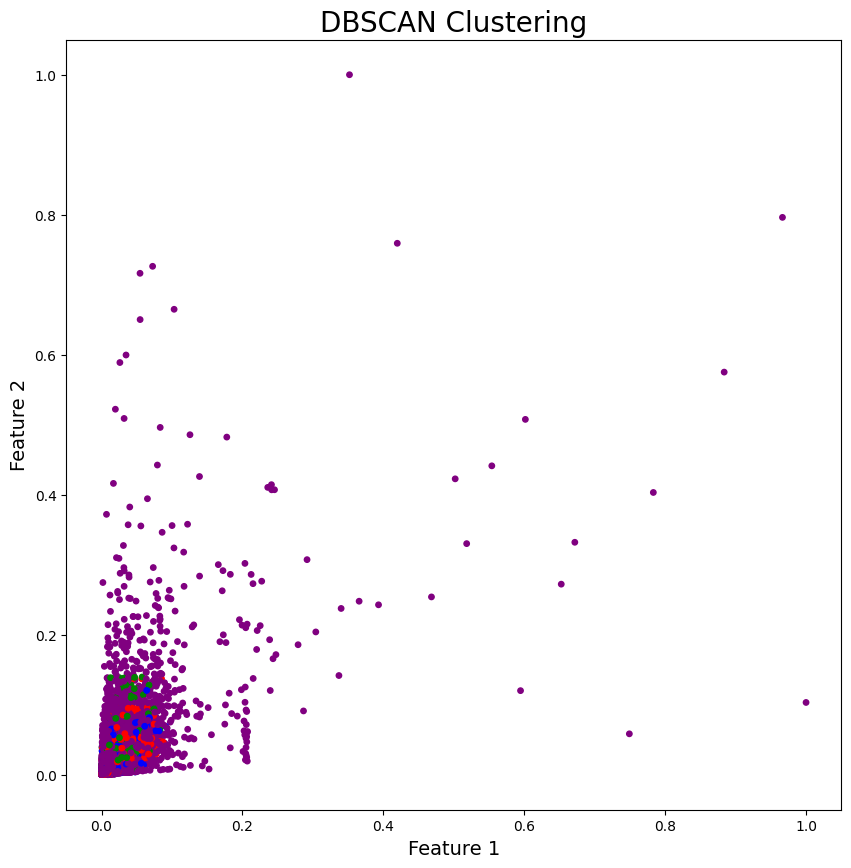

In [124]:
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df["Average Medicare Payment Amount"],df["Money difference"],c=labels,cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()